
# Image Preprocessing and Augmentation

Image data is, obviously, a bit different from other kinds of numerical data. As a result we apply different preprocessing techniques to it. Like other kinds of data, we still commonly rescale pixel data from the common integer range 0-255 to floats between 0-1.

Unique to images, we may choose to flatten RGB data into grayscale, and perform other kinds of image specific transformations that either save processing time or remove noise from the data. Because of the input requirements of neural networks, it is also typically reqeuired that our images all be the same size, so image resizing is almost always applied to our input images, taking care to keep the original aspect ratio can improve performance over squashing images as well.

We may also want to perform a number of simple transformations to our dataset: an image upside down is the same image, and our classifier should recognize it as such.



In [22]:
import keras
from keras.preprocessing import image
import matplotlib.pyplot as plt
import os

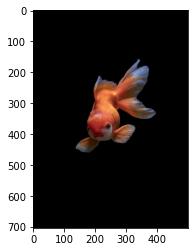

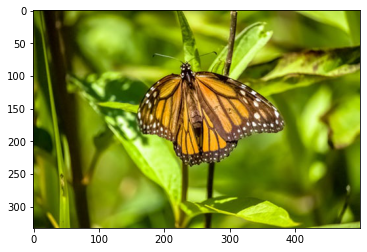

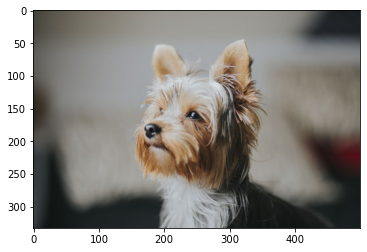

In [23]:
photo_location = 'images/'
for i in os.listdir(photo_location):
    image_show = image.load_img(photo_location+i)
    plt.imshow(image_show)
    plt.show()

* All the images are not of same size, hence we will make all images of same size

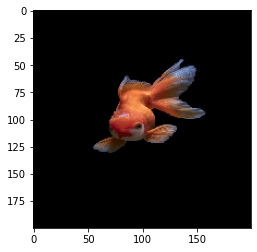

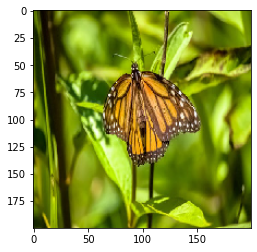

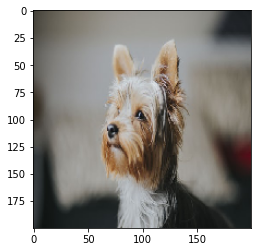

In [24]:
for i in os.listdir(photo_location):
    image_show = image.load_img(path = photo_location+i,
                                target_size = (200,200))
    plt.imshow(image_show)
    plt.show()

* Although all the images of similar size, the photos seem to be squashed, hence will rectify this using Python Image Library;

In [25]:
from PIL import Image, ImageOps
import numpy as np

# here the image will be padded to be square with specified backgournd size, default used is black

def square_image(image, background_color = (0, 0, 0)):
    width, height = image.size
    if width == height:
        result = image
    elif width > height:
        result = Image.new(mode = image.mode,
                           size = (width, width),
                           color = background_color)
        
        result.paste(image, (0, (width - height) // 2))
    elif height > width:
        result = Image.new(mode = image.mode,
                           size = (height, height),
                           color = background_color)
        
        result.paste(image, (0, (height - width) // 2))
        
    return result

# This function takes an image path, loads the image using PIL
# and then returns version of that image which is padded to be
# square then resized to the specified target.

In [26]:
def load_maintain_aspect_ratio(input_image_path, target_size):
    image = Image.open(fp = input_image_path)
    
    image = square_image(image = image).resize(target_size)
    
    image = np.array(image.getdata()).reshape(image.size[0],
                                             image.size[1],
                                             3)
    return np.divide(image, 255)
    

<class 'numpy.ndarray'>


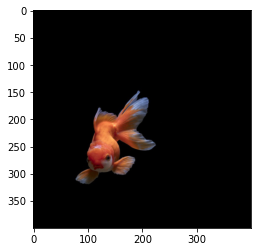

<class 'numpy.ndarray'>


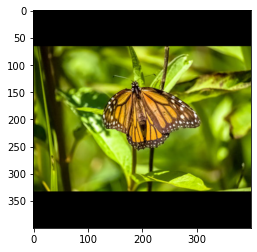

<class 'numpy.ndarray'>


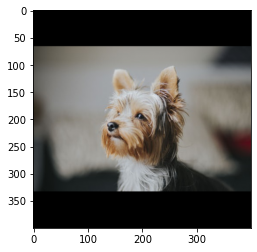

In [27]:
for i in os.listdir(photo_location):
    image_show = load_maintain_aspect_ratio(input_image_path = photo_location+i,
                                            target_size = (400, 400))
    print(type(image_show))
    plt.imshow(image_show)
    plt.show()

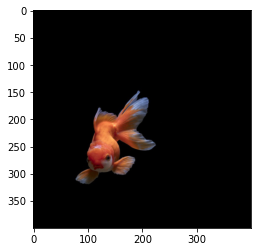

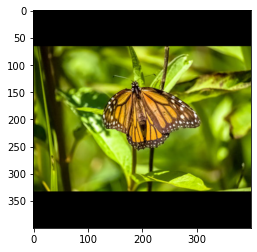

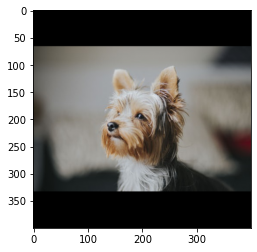

In [28]:
images_list = []
for i in os.listdir(photo_location):
    image_show = load_maintain_aspect_ratio(input_image_path = photo_location+i,
                                            target_size = (400, 400))
    images_list.append(image_show)

for image in images_list:
    plt.imshow(image)
    plt.show()

In [29]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
                            featurewise_center=False,
                            samplewise_center=False,
                            featurewise_std_normalization=False,
                            samplewise_std_normalization=False,
                            zca_whitening=False,
                            zca_epsilon=1e-06,
                            rotation_range=0,
                            width_shift_range=0.0,
                            height_shift_range=0.0,
                            brightness_range=None,
                            shear_range=0.0,
                            zoom_range=0.0,
                            channel_shift_range=0.0,
                            fill_mode='nearest',
                            cval=0.0,
                            horizontal_flip=False,
                            vertical_flip=False,
                            rescale=None,
                            preprocessing_function=None,
                            data_format='channels_last',
                            validation_split=0.0,
                            interpolation_order=1,
                            dtype='float32')

datagen = ImageDataGenerator()

In [30]:
a = np.arange(1,10,1)
b = np.arange(10,15,1)
print("length of array a: ", len(a))
print("length of array b: ", len(b))

for i,j in zip(a,b):
    print('i:',i ,' and j:', j)

length of array a:  9
length of array b:  5
i: 1  and j: 10
i: 2  and j: 11
i: 3  and j: 12
i: 4  and j: 13
i: 5  and j: 14


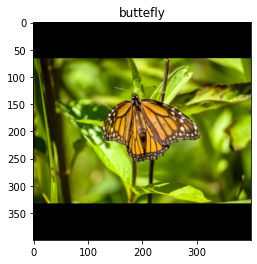

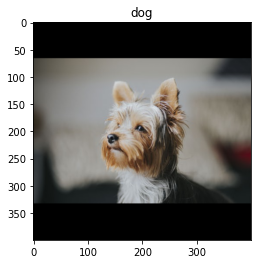

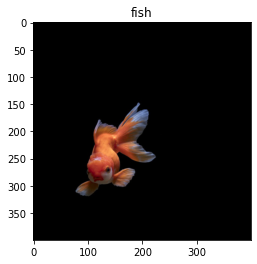

In [31]:
labels = ['fish','buttefly','dog']
image_array = np.array(images_list)
for image_batch, label_batch in datagen.flow(image_array, labels):
    for image, label in zip(image_batch, label_batch):
        plt.title(label)
        plt.imshow(image)
        plt.show()
        
    break

In [40]:
def display_images(datagen, rounds):
    plt.figure(figsize = (15,10))
    
    i = 0
    for image_batch, label_batch in datagen.flow(image_array, labels):
        j = 1
        for image, label in zip(image_batch, label_batch):
#             ax = plt.subplot(nrows = rounds,
#                              ncols = 3,
#                              index = (i*3)+j)
            ax = plt.subplot(rounds,
                             3,
                             (i*3)+j)
            ax.axis('off')
            plt.title(label)
            plt.imshow(image)
#             plt.show()
            
            j = j + 1
        
        i = i + 1
        
        if i >= rounds:
            break       
    plt.tight_layout()
    plt.show()

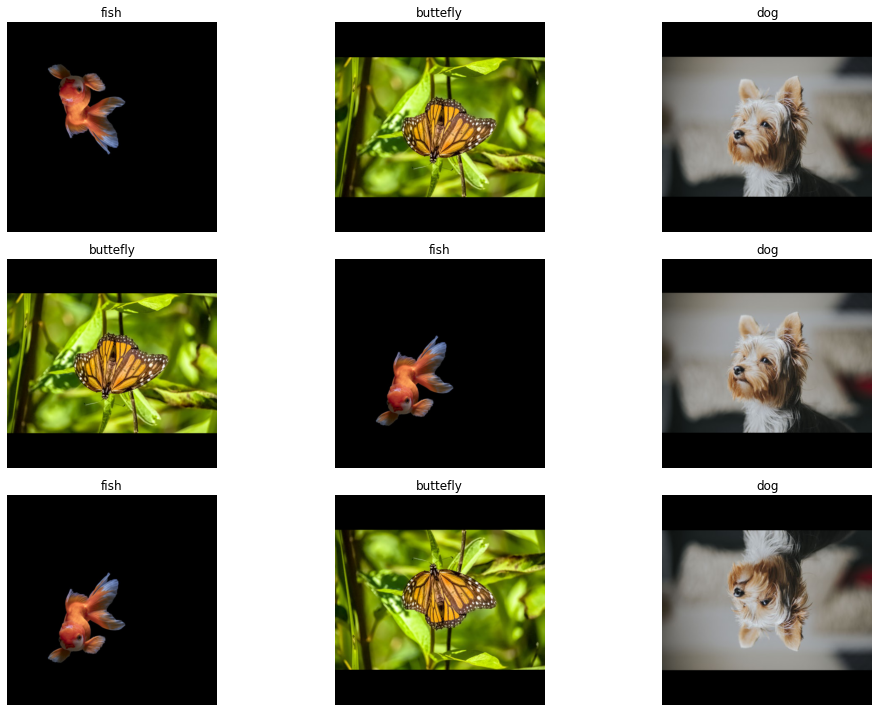

In [42]:
# Add some flips:
datagen = ImageDataGenerator(
    horizontal_flip=False,
    vertical_flip=True,
)

display_images(datagen = datagen,
               rounds = 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


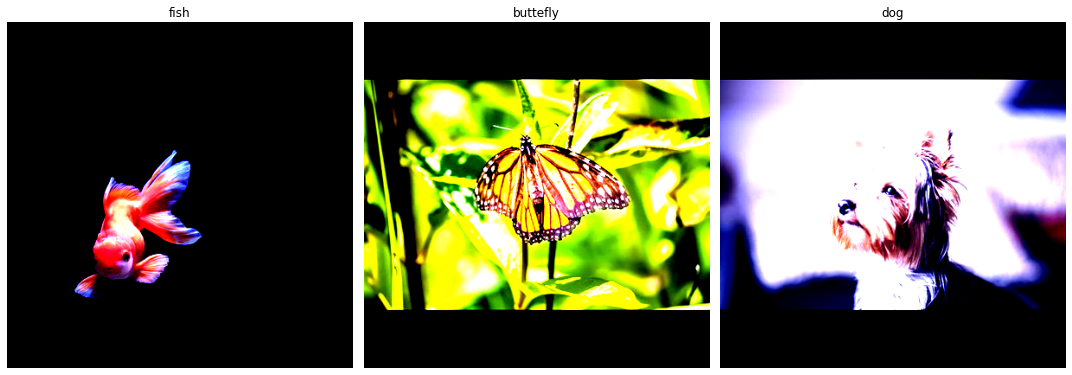

In [43]:
# Normalize the data around, and center it around 0.
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True
)

# Our requested transformation will not applied without .fit, 
# because this particular transformation requires information 
# about the data being passed in.
datagen.fit(images_list)

# We can see from the warnings that these transformations do not maintain the 0-1ness of our data
# In fact, these two combined normalize the data so that the mean is 0 and the std_deviation is 1
# which means we can't really visualize the data perfectly anymore... but you can still get an idea
# of how this transform changes the image data by looking at it:
display_images(datagen, 1)

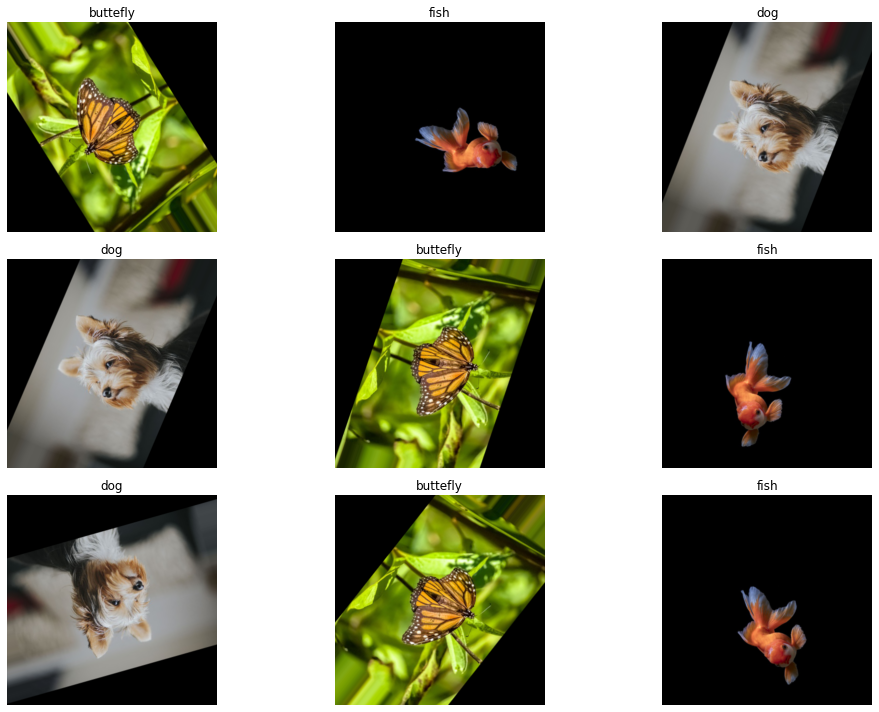

In [44]:
# Random rotations
datagen = ImageDataGenerator(
    rotation_range=360
)

# we don't really have to fit for this one, but it's a good idea 
# to always add this code anyway.  
datagen.fit(images_list)
display_images(datagen, 3)

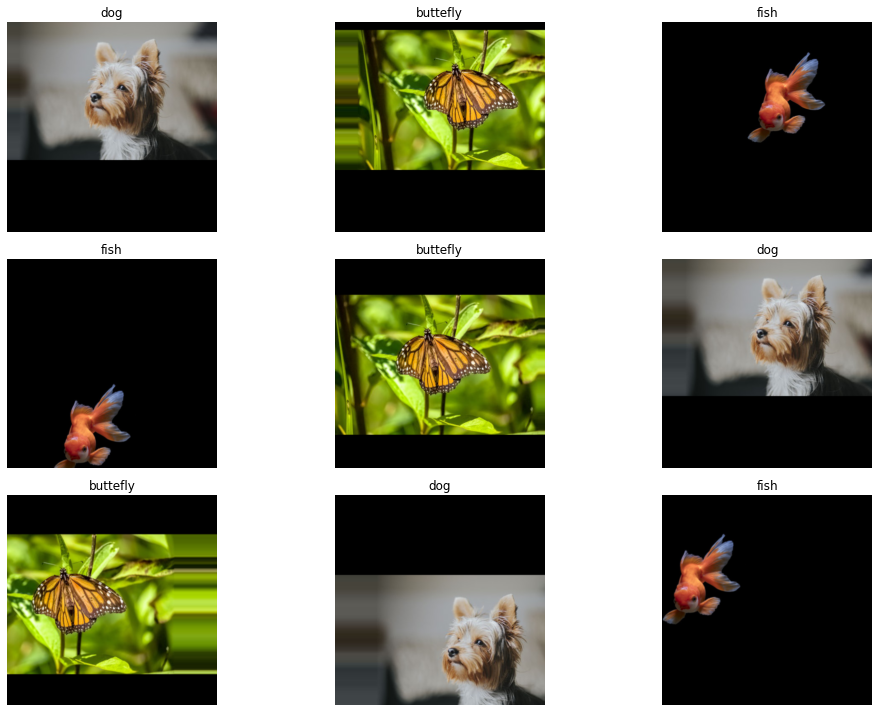

In [45]:


# Shift things around, notice here that the edges of some
# of these images gets pretty weird... we can tell the 
# preprocessor to do something different when it has to 
# fill in pixels that don't exist... see next 
datagen = ImageDataGenerator(
    width_shift_range=100.0,
    height_shift_range=100.0,
)


datagen.fit(images_list)
display_images(datagen, 3)



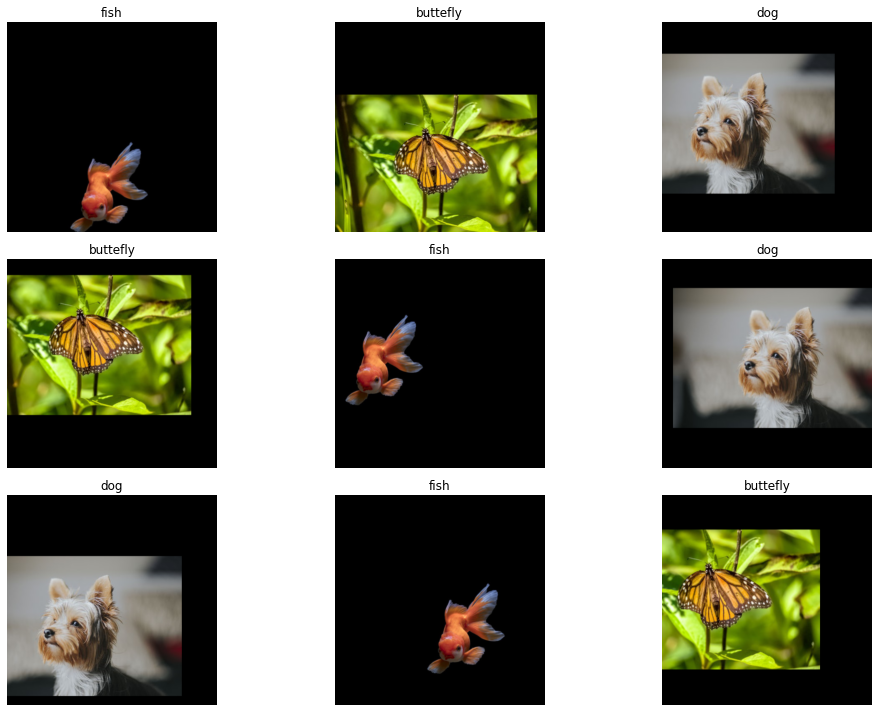

In [46]:
# I prefer this to the default "nearest" 
# esp. since we're already padding images 
# to squares with black pixels. 
datagen = ImageDataGenerator(
    width_shift_range=100.0,
    height_shift_range=100.0,
    fill_mode='constant',
    cval=0 # black
)

datagen.fit(images_list)
display_images(datagen, 3)

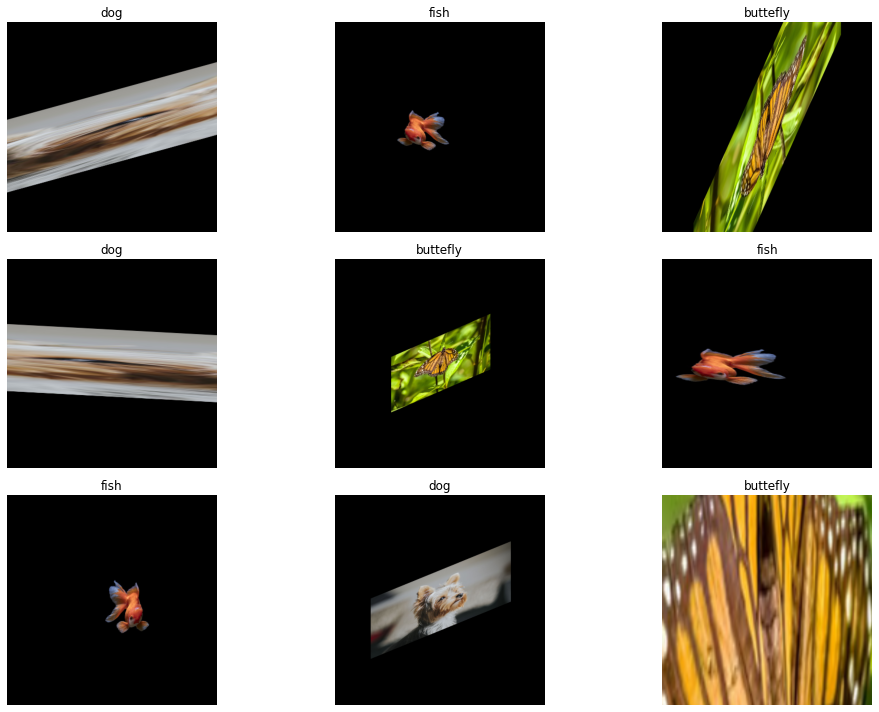

In [47]:
# Shear, zoom. Taken to the extreme these aren't that useful...
datagen = ImageDataGenerator(
    shear_range=360.0, # 0-360, degrees
    zoom_range=2.0,    # Scalar, this allows 2x zoom factor
    fill_mode='constant',
    cval=0 # black
)

# I hope you agree some of these images might as well be noise, and would 
# damage our network's ability to learn. 
datagen.fit(images_list)
display_images(datagen, 3)

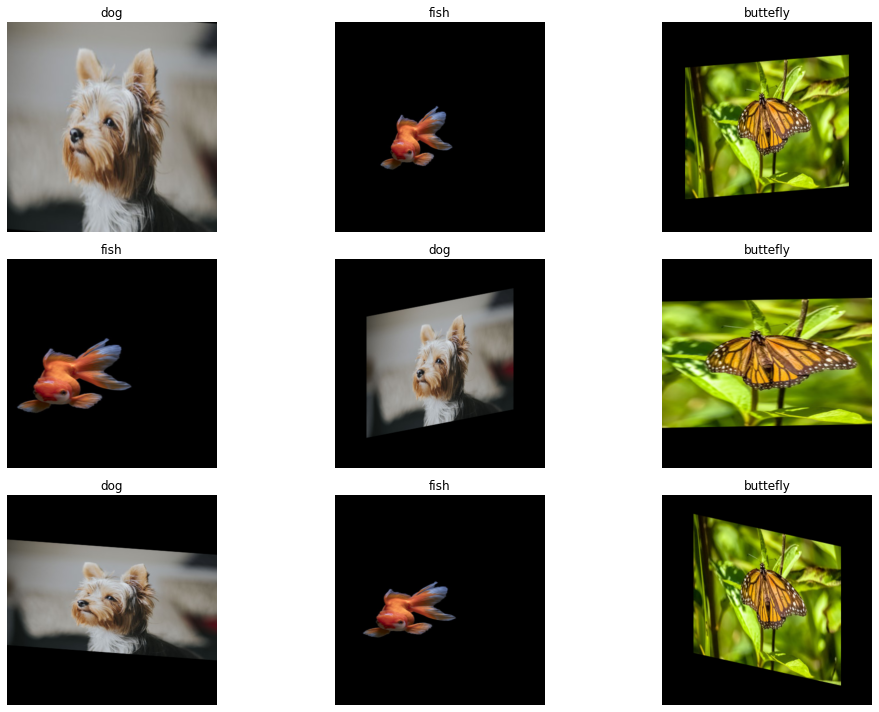

In [49]:
# Shear, zoom. But less extreme, esp. shear
# 
datagen = ImageDataGenerator(
    shear_range=10.0, # 0-10, degrees
    zoom_range=.5,    # Scalar, this allows increase/decrease size by 50%
    fill_mode='constant',
    cval=0 # black
)


datagen.fit(images_list)
display_images(datagen, 3)

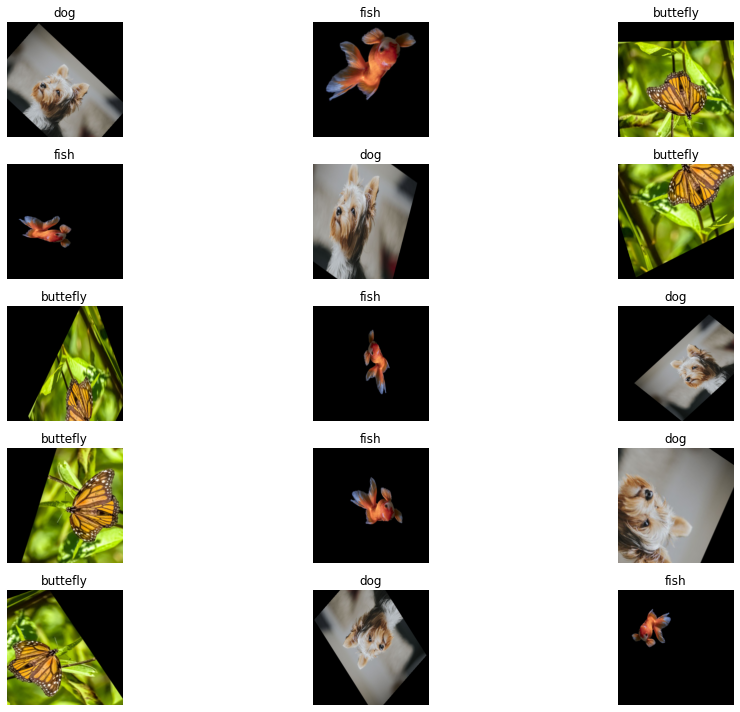

In [50]:
# Taken all together, these transformations may increase the time it takes to train
# but that's okay... they also have been shown to significantly improve performance
# plus, they essentially expand the total size of our dataset, which can allow us
# to perform deep learning while collecting less data! 

# Lets look at one last thing, a good starting point for a genuine generator for use 
# on a real system:

datagen = ImageDataGenerator(
    rotation_range=360,
    width_shift_range=0.2,   # As a float this is the fraction of the width
    height_shift_range=0.2,  # As a float this is the fraction of the height
    shear_range=10, 
    zoom_range=0.5, 
    fill_mode='constant', 
    cval=0.0
)

datagen.fit(images_list) 
display_images(datagen, 5)